# DELIVER MAN CLUSTERING

Pada projek ini aku akan melakukan clustering petugas deliver. Data yang aku gunakan adalah sebuah data deliver menu pada suatu restoran dengan beberapa fitur seperti usia deliver, rating, jarak, lokasi, vehicle, dan waktu yang dibutuhkan.

Clustering ini bertujuan untuk mengcluster pihak deliver terkait performa mereka. Sehingga, bisa dijadikan sebagai acuan untuk menilai kinerja petugas deliver dan bisa menjadi wawasan bagi masyarakat untuk melakukan delivery dengan lebih cepat dan efisien.

# LOAD DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# LOAD DATASET
df = pd.read_csv("deliverytimedataset.csv")
df.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
5,9BB4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,Buffet,motorcycle,26
6,95B4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,Meal,scooter,40
7,9EB2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,Meal,motorcycle,32
8,1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,Buffet,motorcycle,34
9,CDCD,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,Snack,motorcycle,46


# EXPLORATORY DATA ANALISYS (EDA)


1.   Look to dataset information and describe
2.   Check info setiap feature
3.   Cek Nilai Unique tiap feature
4.   Visualisasikan distribusi feature num
5.   Visualisasikan heatmap



In [ ]:
# DATA INFO DAN DESCRIBE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [ ]:
# DESCRIBE DATA
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [ ]:
# CEK NILAI UNIQUE PER FEATURE
print("Nilai Unique: ")
print(df.nunique())

Nilai Unique: 
ID                             45446
Delivery_person_ID              1320
Delivery_person_Age               22
Delivery_person_Ratings           28
Restaurant_latitude              657
Restaurant_longitude             518
Delivery_location_latitude      4373
Delivery_location_longitude     4373
Type_of_order                      4
Type_of_vehicle                    4
Time_taken(min)                   45
dtype: int64


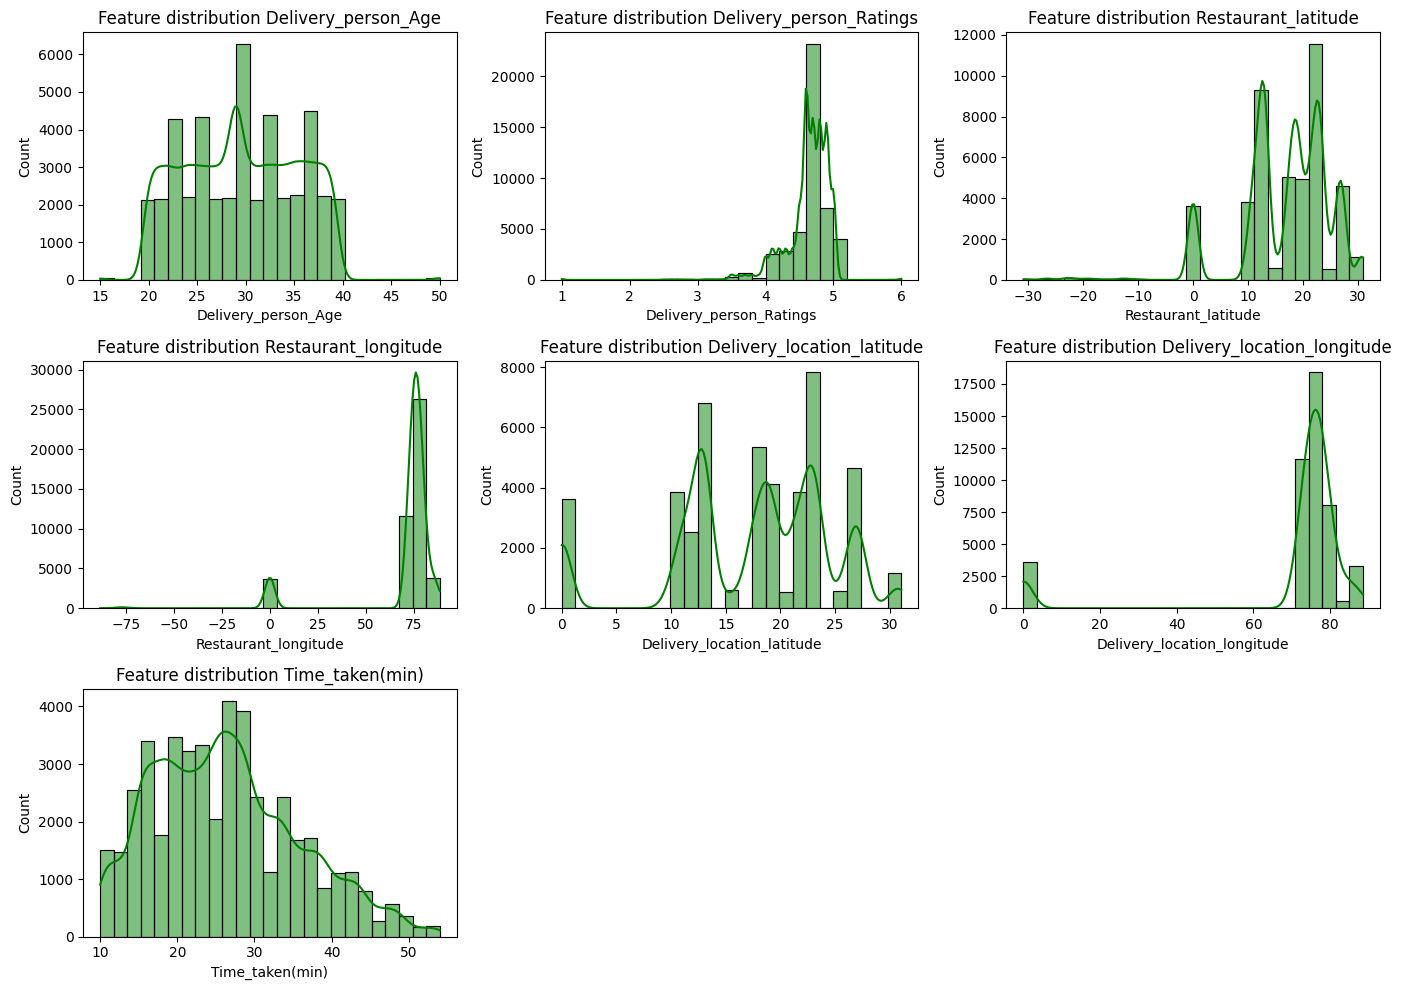

In [ ]:
# BUAT VISUALISASI DITRIBUSI TIAP FITUR NUMERIK
num_feature = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14,10))
for i, column in enumerate(num_feature.columns, 1):
  plt.subplot(3,3,i)
  sns.histplot(df[column], bins=25, kde=True, color='green')
  plt.title(f"Feature distribution {column}")
plt.tight_layout()
plt.show()

**HASIL ANALISIS**



1.   Delivery_person_Age


*   Normal
*   Tertinggi di rentang 30-35
*   Siap di cluster


2.   Delivery_person_Ratings
*   Masih normal (lonceng)
*   Skewed kanan (deliver rating tinggi)

3.   Longitude Latitude
*   Masih belum merata
*   Akan dilakukan pencarian jarak dalam km dengan Haversine methode

4.   Time_taken(min)
*   Lumayan cukup normal
*   Skewwed kiri (menandakan kalau waktu yang dibutuhkan sedikit)
*   Siap untuk di cluster



Text(0.5, 1.0, 'Fetaure Corelation')

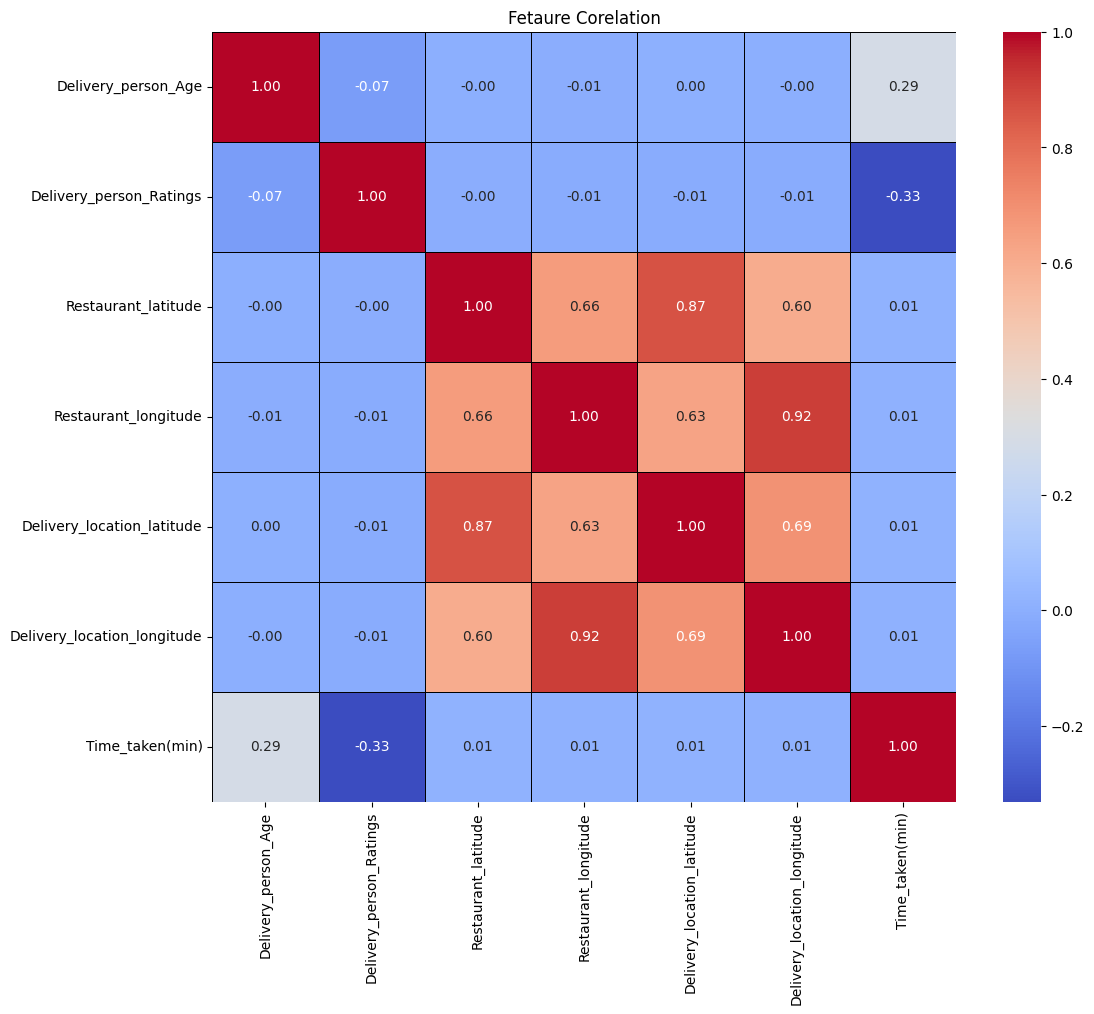

In [ ]:
# LAKUKAN VISUALISASI HEATMAP KORELASI FEATURE

plt.figure(figsize=(12,10))
mat_cor = num_feature.corr()
sns.heatmap(mat_cor, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title("Fetaure Corelation")

**HASIL ANAILISIS**



1.   Beberapa fitur tidak berkorelasi dengan dekat -> ini bagus karena semakin memperbanyak variasi data dan memperluas sebaran distribusi data
2.   Korelasi tertinggi terletak di feature-feature latitude dan longitude.



# DATA PREPROCESSING



1.   Drop feature nggak perlu
2.   Tangani Missing Value
3.   Label Encoding
4.   Haversine Metode
5.   Filter Outlier
6.   Scalling Std



In [ ]:
# DROP DATA TIDAK PERLU
df = df.drop(columns=['ID', 'Delivery_person_ID', 'Type_of_order'])
print(df.columns)

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_vehicle', 'Time_taken(min)'],
      dtype='object')


In [ ]:
# CEK MISSING VALUE
print("Cek Missing Value: ")
print(df.isnull().sum())

Cek Missing Value: 
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64


In [ ]:
# LABEL ENCODING UNTUK TYPE CATEGORY
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Vehicle_Encoded'] = le.fit_transform(df['Type_of_vehicle'])

# Lihat hasil mapping
vehicle_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping kategori vehicle ke angka: ", vehicle_mapping)

df.head()

Mapping kategori vehicle ke angka:  {'bicycle ': np.int64(0), 'electric_scooter ': np.int64(1), 'motorcycle ': np.int64(2), 'scooter ': np.int64(3)}


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_vehicle,Time_taken(min),Vehicle_Encoded
0,37,4.9,22.745049,75.892471,22.765049,75.912471,motorcycle,24,2
1,34,4.5,12.913041,77.683237,13.043041,77.813237,scooter,33,3
2,23,4.4,12.914264,77.678400,12.924264,77.688400,motorcycle,26,2
3,38,4.7,11.003669,76.976494,11.053669,77.026494,motorcycle,21,2
4,32,4.6,12.972793,80.249982,13.012793,80.289982,scooter,30,3


In [ ]:
# DROP VEHICLE KATEGORIKAL
df = df.drop(columns=['Type_of_vehicle'])
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),Vehicle_Encoded
0,37,4.9,22.745049,75.892471,22.765049,75.912471,24,2
1,34,4.5,12.913041,77.683237,13.043041,77.813237,33,3
2,23,4.4,12.914264,77.678400,12.924264,77.688400,26,2
3,38,4.7,11.003669,76.976494,11.053669,77.026494,21,2
4,32,4.6,12.972793,80.249982,13.012793,80.289982,30,3


In [ ]:
# HAVERSINE METODE
# Ubah feature latitude longitude ke dalam bentuk distance (km) agar bisa dimanfaatkan


def haversine(lat1, lon1, lat2, lon2):
  # Radius bumi dalam kilometer
  R = 6371.0

  # KOnversi derajat ke radian
  lat1_rad = np.radians(lat1)
  lon1_rad = np.radians(lon1)
  lat2_rad = np.radians(lat2)
  lon2_rad = np.radians(lon2)

  # Selisih koordinat
  dlat = lat2_rad - lat1_rad
  dlon = lon2_rad - lon1_rad

  # Rumus Haversine
  a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
  c = 2 * np.arcsin(np.sqrt(a))
  distance = R * c
  return distance

# TERAPKAN KE DATAFRAME
df['distance_km'] = haversine(
    df['Restaurant_latitude'],
    df['Restaurant_longitude'],
    df['Delivery_location_latitude'],
    df['Delivery_location_longitude']
)

df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),Vehicle_Encoded,distance_km
0,37,4.9,22.745049,75.892471,22.765049,75.912471,24,2,3.025149
1,34,4.5,12.913041,77.683237,13.043041,77.813237,33,3,20.183530
2,23,4.4,12.914264,77.678400,12.924264,77.688400,26,2,1.552758
3,38,4.7,11.003669,76.976494,11.053669,77.026494,21,2,7.790401
4,32,4.6,12.972793,80.249982,13.012793,80.289982,30,3,6.210138


In [ ]:
# DROP LATITUDE DAN LONGITUDE FEATURE

df = df.drop(columns=['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'])
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_taken(min),Vehicle_Encoded,distance_km
0,37,4.9,24,2,3.025149
1,34,4.5,33,3,20.183530
2,23,4.4,26,2,1.552758
3,38,4.7,21,2,7.790401
4,32,4.6,30,3,6.210138


In [ ]:
# DETEKSI OUTLIER DAN DROP OUTLIER

# Pilih kolom numerik yang ingin diperiksa outlier-nya
num_cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_taken(min)', 'distance_km']

# Buat salinan dataframe agar aman
df_no_outliers = df.copy()

# Loop tiap kolom untuk deteksi dan hapus outlier
for col in num_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data di luar batas sebagai outlier
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

print(f"Sisa data setelah membuang outlier: {df_no_outliers.shape}")


Sisa data setelah membuang outlier: (39329, 5)


In [ ]:
# SCALLING STANDARIZATION
from sklearn.preprocessing import StandardScaler

scale_feature = [
    'Delivery_person_Age',
    'Delivery_person_Ratings',
    'Time_taken(min)',
    'distance_km'
]

scaler = StandardScaler()
df_scaled = df_no_outliers.copy()
df_scaled[scale_feature] = scaler.fit_transform(df_scaled[scale_feature])

# TAMPILKAN HASIL STANDARISASI
df_scaled.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_taken(min),Vehicle_Encoded,distance_km
0,1.378684,1.008520,-0.090309,2,-1.161976
1,0.846928,-1.249161,0.960168,3,1.912503
2,-1.102843,-1.813582,0.143130,2,-1.425803
3,1.555936,-0.120321,-0.440468,2,-0.308127
4,0.492424,-0.684741,0.610009,3,-0.591283


# KMeans Cluster


1.   Elbow visualizer untuk mencari jumlah k terbaik untuk clustering
2.   KMeans Clustering
3.   Visualisasi



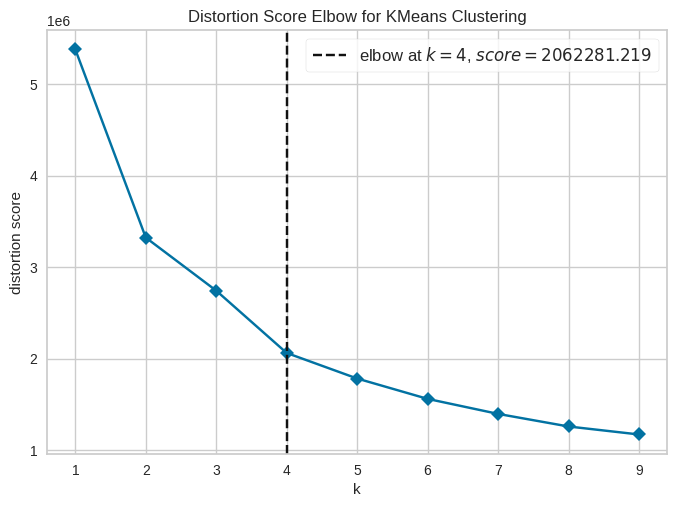

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# ELBOW VISUALIZER
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
Visualizer = KElbowVisualizer(model, k=(1,10), timings=False)
Visualizer.fit(df_no_outliers)
Visualizer.show()

In [ ]:
# KMeans Clustering dengan K = 4
kmeans = KMeans(n_clusters=4, random_state=42)
df_no_outliers['Cluster'] = kmeans.fit_predict(df_no_outliers)

# Analisis dan show hasil
for cluster_id in sorted(df_no_outliers['Cluster'].unique()):
    cluster_data = df_no_outliers[df_no_outliers['Cluster'] == cluster_id]
    mean_time = cluster_data['Time_taken(min)'].mean()
    mean_distance = cluster_data['distance_km'].mean()

    print(f"Cluster {cluster_id}")
    print(f"Mean Time Taken (min)     : {mean_time:.2f}")
    print(f"Mean Distance (km)        : {mean_distance:.2f}")
    print("-" * 40)

Cluster 0
Mean Time Taken (min)     : 25.97
Mean Distance (km)        : 6.60
----------------------------------------
Cluster 1
Mean Time Taken (min)     : 23.58
Mean Distance (km)        : 14.85
----------------------------------------
Cluster 2
Mean Time Taken (min)     : 16.46
Mean Distance (km)        : 5.78
----------------------------------------
Cluster 3
Mean Time Taken (min)     : 39.15
Mean Distance (km)        : 13.61
----------------------------------------


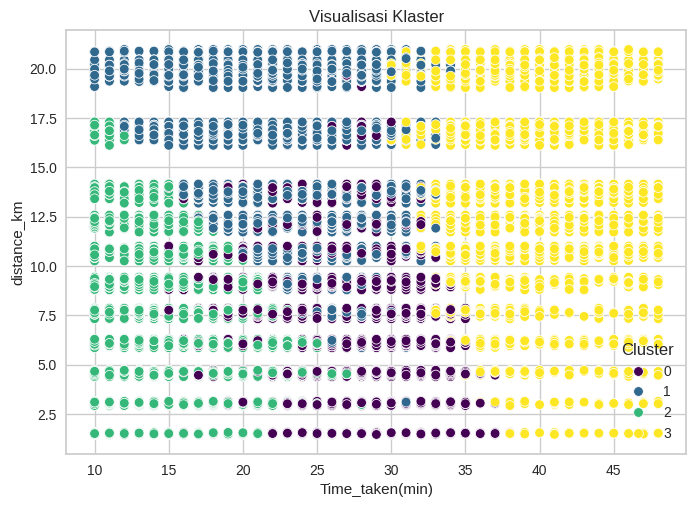

In [ ]:
# VISUALISASI CLUSTERING

import seaborn as sns

sns.scatterplot(data=df_no_outliers, x='Time_taken(min)', y='distance_km', hue='Cluster', palette="viridis")
plt.title('Visualisasi Klaster')
plt.show()

# INTERPRETASI HASIL CLUSTERING



1.   CLUSTER 1 (UNGU)
*    Waktu deliver menengah - lama (20 - 35 menit)
*    Jarak tempuh dekat-menengah (2-15 km)
*    Kemungkinan penggunaan kendaraan lambat (sepeda, sekuter manual)
*    Rentang usia kurang aktif dan rating rendah
*    Delivery dengan performa paling rendah

2.   CLUSTER 2 (BIRU)
*    Waktu deliver cepat (10-25 menit)
*    Jarak tempuh jauh (12-20+ km)
*    Penggunaan kendaraan yang cepat (motor, dan sekuter elektrik)
*    Rentang usia aktif
*    Delivery dengan performa paling baik

3.  CLUSTER 3 (HIJAU)
*   Waktu deliver cepat (10-25 menit)
*   Jarak tempuh dekat-menengah (2-15 km)
*   Kemungkinan penggunaan kendaraan menyeluruh, namun bergantung pada kondisi rute
*   Rentang usia menyeluruh
*   Performa delivery Sedang

4.  CLUSTER 4 (KUNING)
*   Waktu deliver lama (35 menit keatas)
*   Jarak tempuh menyeluruh
*   Penggunaan kendaraan lambat (sepeda, sekuter manual)
*   Usia dan Rating menyeluruh namun dipengaruhi besar oleh kondisi Rute  

